In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
#Import data
import os 
path = os.listdir('DataSet/Training/')
classes = {'glioma_tumor':0, 'meningioma_tumor':1, 'no_tumor':2 , 'pituitary_tumor':3}

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'DataSet/Training/'

In [3]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'DataSet/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j,0)
        img = cv2.resize(img,(200,200))
        X.append(img)
        Y.append(classes[cls])

In [4]:
np.unique(Y)

array([0, 1, 2, 3])

In [5]:
X = np.array(X)
Y = np.array(Y)

In [6]:
pd.Series(Y).value_counts()

3    827
0    826
1    822
2    395
dtype: int64

In [7]:
X.shape

(2870, 200, 200)

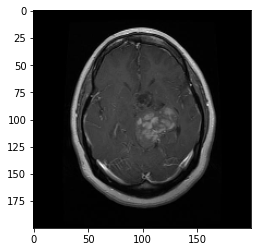

In [8]:
#Visualize Data - To check particular image
plt.imshow(X[0],cmap='gray')

In [9]:
#Prepare Data
X_updated = X.reshape(len(X),-1)
X_updated.shape

(2870, 40000)

In [10]:
#Split Data
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,test_size=.20)

In [11]:
xtrain.shape, xtest.shape

((2296, 40000), (574, 40000))

In [12]:
#Feature Scaling
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [13]:
#Feature Selection : PCA
from sklearn.decomposition import PCA
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(2296, 40000) (574, 40000)


In [14]:
#Train Model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

LogisticRegression(C=0.1)

In [15]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

In [16]:
#Evaluation 
print("Training Score : ", lg.score(pca_train, ytrain))
print("Testing Score : ", lg.score(pca_test, ytest))

Training Score :  0.9982578397212544
Testing Score :  0.789198606271777


In [17]:
print("Training Score : ", sv.score(pca_train, ytrain))
print("Testing Score : ", sv.score(pca_test, ytest))

Training Score :  0.938588850174216
Testing Score :  0.818815331010453


In [18]:
#Prediction
pred = sv.predict(pca_test)
np.where(ytest!=pred)

(array([  0,   1,   9,  11,  15,  18,  23,  28,  34,  37,  54,  55,  57,
         65,  66,  67,  72,  79,  82,  84,  87,  94,  98, 110, 116, 117,
        118, 119, 123, 133, 148, 184, 185, 187, 190, 191, 193, 194, 196,
        201, 204, 206, 208, 209, 211, 214, 219, 225, 229, 233, 236, 239,
        260, 261, 266, 272, 273, 274, 278, 288, 300, 304, 305, 308, 318,
        319, 320, 339, 349, 353, 361, 365, 374, 387, 393, 403, 416, 420,
        422, 423, 424, 432, 439, 444, 453, 457, 470, 472, 473, 475, 486,
        489, 507, 508, 512, 522, 526, 528, 529, 532, 539, 543, 557, 568],
       dtype=int64),)

In [19]:
pred[148]

3

In [20]:
plt.scatter(x,y,c=y,cmap='rainbow')
plt.title('Scatter Plot')
plt.show()

1

In [18]:
#Test Model
dec = {0:'glioma_tumor', 1:'meningioma_tumor', 2:'no_tumor' , 3:'pituitary_tumor'}

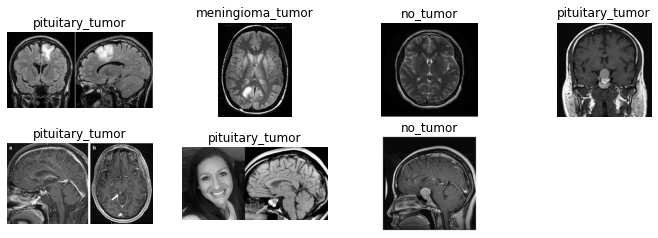

In [20]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/Abhishek Patwardhan/Desktop/TE-Project/DataSet/Testing/')
c=1
for i in os.listdir('C:/Users/Abhishek Patwardhan/Desktop/TE-Project/DataSet/Testing/Unseen/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('C:/Users/Abhishek Patwardhan/Desktop/TE-Project/DataSet/Testing/Unseen/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = lg.predict(img1)
#     p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [2]:
import pickle

In [3]:
filename = 'BT-detection-model'
pickle.dump(lg,open(filename,'wb'))


NameError: name 'lg' is not defined

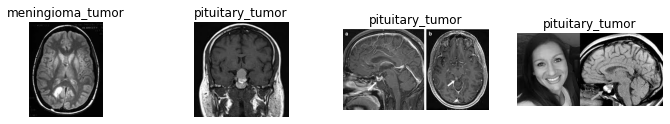

In [24]:
loaded_model = pickle.load(open(filename,'rb'))
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/Abhishek Patwardhan/Desktop/TE-Project/DataSet/Testing/')
c=1
for i in os.listdir('C:/Users/Abhishek Patwardhan/Desktop/TE-Project/DataSet/Testing/Unseen/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('C:/Users/Abhishek Patwardhan/Desktop/TE-Project/DataSet/Testing/Unseen/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = loaded_model.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1